# Zhenfeng Liang

# MTH9879 Homework 7

Assigned: March 31, 2015.
Due: April 14, 2015 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Yu Gan (yugan323@gmail.com), Fubo Shi (fubo.shi.baruch@gmail.com), and Tai-Ho Wang (tai-ho.wang@baruch.cuny.edu) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

<font color="blue">If you encounter problems with Markdown/LaTeX or iPython notebook, please contact your TAs Yu Gan and/or Fubo Shi.


### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

## Solution

Because $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$, $\Var[\epsilon_i] = 0$

\begin{eqnarray}
\Var[X_{t+\tau}-X_t] &=& \Var[\sum_{i=t+1}^{t + \tau}\,\epsilon_i] \\
&=& \sum_{i,j = t+1}^{t + \tau} \Cov(\epsilon_i ,\, \epsilon_j) \\
&\sim& 2 \sum_{i = 1}^{\tau - 1} (\tau - i)i^{- \alpha} \\
&\approx& 2\int_{1}^{\tau - 1}(\tau - x)x^{- \alpha}dx \\
&=& \frac{2\,\tau}{1 - \alpha} ((\tau - 1)^{1 - \alpha} - 1) - \frac{2}{2 - \alpha}((\tau - 1)^{2-\alpha} - 1) \\
&\sim& \tau^{2 - \alpha} \\
&\sim& \tau^{2H}  
\end{eqnarray}
where $H = 1 - \frac{\alpha}{2}$

## MSFT data from Alejandro Ca&ntilde;ete

### Set up R environment

In [1]:
%load_ext rmagic

In [2]:
%%R
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

trying URL 'http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip'
Content type 'application/zip' length 71919 bytes (70 Kb)
opened URL
downloaded 70 Kb



### 2. (6 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.

(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$

(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?

(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


In [51]:
%%R

### (a)
ts.inet <- sign(msft130311.inet$signed.shares)

In [52]:
%%R

### (b)
fit.inet <- lm(ts.inet[2:length(ts.inet)]~ts.inet[1:length(ts.inet)-1])
phi1 <- fit.inet$coefficients[2]

tradeSignForecast <- function(formerSign){
    return (phi1 * formerSign)
}

In [53]:
%%R

### (c)
# Define a function to calculate mean-squared error 
MSE <- function(residualsVec){
    return (mean(residualsVec^2))
}

CalMSE <- function(lmResult){
    sm <- summary(lmResult)
    mse <- MSE(sm$residuals)
    return(mse)
}

# Use functions to do part c
acts.inet <- acf(ts.inet, plot=F)
cat("Autocorrelation coefficients of tradeSign where lag = 1 is", acts.inet$acf[2])
cat("\nPhi1 is", phi1)

# Calculate MSE
mse <- CalMSE(fit.inet)
cat("\nThe mean-squared error of AR(1) is", mse)

Autocorrelation coefficients of tradeSign where lag = 1 is 0.8210177
Phi1 is 0.8210784
The mean-squared error of AR(1) is 0.3234549

### We could see that $\phi$ equals to the autocorrelation coefficients of tradeSign

In [54]:
%%R

### (d)
AR_p <- function(p, tradeSign){

    len <- length(tradeSign)
    listoffactors <- c()
    for (i in p:1){
        offset <- 1+p-i
        offset <- len - offset
        newVar <- paste("tradeSign[", deparse(i),":", deparse(offset), "]")
        listoffactors <- c(listoffactors, newVar)
    }
    
    yVar <- paste("tradeSign[", deparse(1+p),":",deparse(len),"]")
    formula <- as.formula(paste(yVar,"~",paste(listoffactors,collapse="+")))
    return (lm(formula))
}

SelectModel_AIC <- function(tradeSign, numVariTrials){
    
    min <- Inf
    k <- 0
    for(i in 1:numVariTrials){
        ar_i <- AR_p(i, tradeSign)
        aic <- AIC(ar_i, k = i)
        
        if (aic < min){
            k <- i
            min <- aic
        }
    }
    return (k)
}

In [60]:
%%R

### (e)
numVariTrials <- 20

selectedNumVariable <- SelectModel_AIC(ts.inet, numVariTrials)
#selectedNumVariable <- 14
fitted_model <- AR_p(selectedNumVariable, ts.inet)
aic <- AIC(fitted_model, k = selectedNumVariable)
cat("Best fitted model's p under 1 :", numVariTrials, "trials is: ", selectedNumVariable)
cat("\nThe best fitted model's AIC is: ", aic)

fitted_mse <- CalMSE(fitted_model)
cat("\nThe MSE of this AR(p) model is: ", fitted_mse)

Best fitted model's p under 1 : 20 trials is:  8
The best fitted model's AIC is:  26929.67
The MSE of this AR(p) model is:  0.3119226

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.

(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).

(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

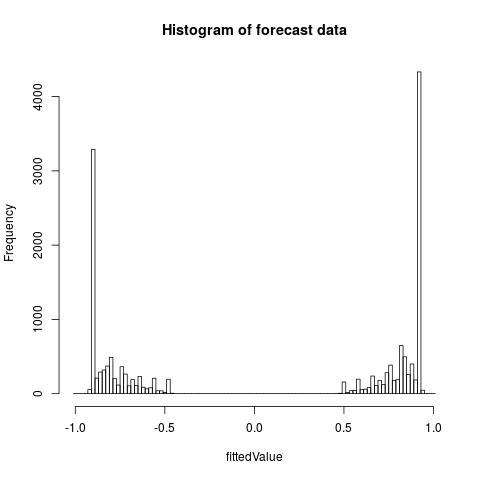

In [57]:
%%R

### (a) 

fittedValue <- fitted(fitted_model)

# Assign the bin value
x <- c()
temp <- -1.01
for(i in 1:102){
    x <- c(x, temp)
    temp = temp + 0.02
}

# Plot histogram
hist(fittedValue, breaks = x, main = "Histogram of forecast data")

In [58]:
%%R

### A function to calculate the average fitted order sign and average actual order sign in each bin
CalAverageOrderSign <- function(actualOrderSign, fittedOrderSign){
    
    leftBound <- -1.01
    len <- length(fittedOrderSign)
    
    actualAverage <- c()
    fittedAverage <- c()
    
    for(i in 1:101){
        rightBound <- leftBound + 0.02
        numOfObs <- 0
        sumFitted <- 0
        sumActual <- 0
        
        for(j in 1:len)
        {
            temp <- fittedOrderSign[j]            
            if((temp >= leftBound) && (temp < rightBound))
            {
                sumFitted = sumFitted + temp
                sumActual = sumActual + actualOrderSign[j]
                numOfObs = numOfObs + 1
            }
        }
        fittedAveTemp <- 0
        actualAveTemp <- 0
        
        if(numOfObs != 0){
            fittedAveTemp <- sumFitted/numOfObs
            actualAveTemp <- sumActual/numOfObs            
        }

        fittedAverage <- c(fittedAverage, fittedAveTemp)
        actualAverage <- c(actualAverage, actualAveTemp)
        leftBound <- rightBound
    }
    return(list(forecastAveOrderSign = fittedAverage, actualAveOrderSign = actualAverage))   
}



The slope between the average actual order sign and the average fitted order sign is 0.964222

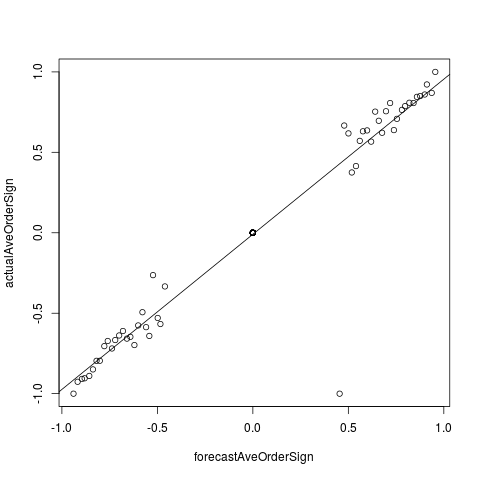

In [59]:
%%R

### (b) 

# Select the effective fitted order sign observations
fittedOrderSign <- fittedValue

# Select the effective actual order sign observations
begin <- 1+selectedNumVariable
actualOrderSign <- ts.inet[begin:len]

# Calculate the average in each bin
VecList <- CalAverageOrderSign(actualOrderSign, fittedOrderSign)

# Extract the average result
forecastAveOrderSign <- VecList$forecastAveOrderSign
actualAveOrderSign <- VecList$actualAveOrderSign

# Plot the graph
plot(forecastAveOrderSign, actualAveOrderSign)
fit <- lm(actualAveOrderSign~forecastAveOrderSign)
abline(fit)

# Output the slope
sm <- summary(fit)
cat("The slope between the average actual order sign and the average fitted order sign is", sm$coefficients[2,1])


### Solution (c)

As we know,

\begin{eqnarray}
\hat \epsilon_t &=& \mathbb{E} [\epsilon_t|\mathcal{F} _{t-1}] \\
&=& p + (1 - p) * (-1)
&=& 2p - 1
\end{eqnarray}

So, $p = (\hat \epsilon_t + 1)/2$